In [1]:
import matplotlib.pyplot as plt
import gymnasium as gym
import shimmy
import sliding_puzzles
import dmc_utils

In [2]:
from gymnasium.envs.registration import registry
DM_CONTROL_ENV_IDS = [
    print(env_id)
    for env_id in registry
    if env_id.startswith("dm_control") and env_id != "dm_control/compatibility-env-v0"
]

dm_control/acrobot-swingup-v0
dm_control/acrobot-swingup_sparse-v0
dm_control/ball_in_cup-catch-v0
dm_control/cartpole-balance-v0
dm_control/cartpole-balance_sparse-v0
dm_control/cartpole-swingup-v0
dm_control/cartpole-swingup_sparse-v0
dm_control/cartpole-two_poles-v0
dm_control/cartpole-three_poles-v0
dm_control/cheetah-run-v0
dm_control/dog-stand-v0
dm_control/dog-walk-v0
dm_control/dog-trot-v0
dm_control/dog-run-v0
dm_control/dog-fetch-v0
dm_control/finger-spin-v0
dm_control/finger-turn_easy-v0
dm_control/finger-turn_hard-v0
dm_control/fish-upright-v0
dm_control/fish-swim-v0
dm_control/hopper-stand-v0
dm_control/hopper-hop-v0
dm_control/humanoid-stand-v0
dm_control/humanoid-walk-v0
dm_control/humanoid-run-v0
dm_control/humanoid-run_pure_state-v0
dm_control/humanoid_CMU-stand-v0
dm_control/humanoid_CMU-walk-v0
dm_control/humanoid_CMU-run-v0
dm_control/lqr-lqr_2_1-v0
dm_control/lqr-lqr_6_2-v0
dm_control/manipulator-bring_ball-v0
dm_control/manipulator-bring_peg-v0
dm_control/manipula

In [3]:
env = gym.make("dm_control/cartpole-swingup-v0", render_mode="rgb_array", visualize_reward=False)

In [4]:
env = dmc_utils.ActionRepeatWrapper(env, 3)
print(env.observation_space)
env = gym.wrappers.FrameStackObservation(env, 3)
print(env.observation_space)
env = gym.wrappers.FlattenObservation(env)
print(env.observation_space)

Dict('position': Box(-inf, inf, (3,), float64), 'velocity': Box(-inf, inf, (2,), float64))
Dict('position': Box(-inf, inf, (3, 3), float64), 'velocity': Box(-inf, inf, (3, 2), float64))
Box(-inf, inf, (15,), float64)


In [5]:
env.reset()

({'position': array([-0.01136996, -0.9999989 ,  0.00148323]),
  'velocity': array([-0.00801868,  0.01958821])},
 {'timestep.discount': None, 'timestep.step_type': <StepType.FIRST: 0>})

In [6]:
env.render(width=84, height=84, camera_id=0)

TypeError: env_render_passive_checker() got an unexpected keyword argument 'width'

In [4]:
env = dmc_utils.DMCPixelsWrapper(env)
obs, _ = env.reset()
obs.shape, env.observation_space.shape

((84, 84, 3), (84, 84, 3))

In [5]:
env = gym.wrappers.FrameStack(env, 3)
obs, _ = env.reset()
obs.shape, env.observation_space.shape

((3, 84, 84, 3), (3, 84, 84, 3))

In [6]:
env = dmc_utils.FrameStackToChannelAxisWrapper(env)
obs, _ = env.reset()
obs.shape, env.observation_space.shape

((9, 84, 84), (9, 84, 84))

In [8]:
env = sliding_puzzles.wrappers.ChannelFirstImageWrapper(env)
obs, _ = env.reset()
obs.shape, env.observation_space.shape

((84, 9, 84), (9, 84, 84))

In [10]:
sorted(env.observation_space.shape)

[9, 84, 84]

In [9]:
env.should_transpose

True

In [ ]:
env = sliding_puzzles.wrappers.NormalizedImageWrapper(env)
obs, _ = env.reset()
obs.shape, env.observation_space.shape

In [8]:
env = gym.wrappers.FlattenObservation(env)
env.observation_space.shape

(15,)

In [3]:
env = gym.wrappers.GrayscaleObservation(env)
obs, _ = env.reset()
obs.shape

(84, 84)

In [5]:
obs / 255.0

array([[[0.25882353, 0.39215686, 0.52156863],
        [0.2627451 , 0.39215686, 0.5254902 ],
        [0.2627451 , 0.39215686, 0.5254902 ],
        ...,
        [0.27058824, 0.4       , 0.53333333],
        [0.2745098 , 0.4       , 0.53333333],
        [0.25882353, 0.39215686, 0.52156863]],

       [[0.25882353, 0.38823529, 0.52156863],
        [0.25882353, 0.39215686, 0.52156863],
        [0.25882353, 0.39215686, 0.52156863],
        ...,
        [0.25882353, 0.39215686, 0.52156863],
        [0.25882353, 0.39215686, 0.52156863],
        [0.25882353, 0.38823529, 0.52156863]],

       [[0.25882353, 0.38823529, 0.51764706],
        [0.25882353, 0.38823529, 0.51764706],
        [0.25882353, 0.38823529, 0.51764706],
        ...,
        [0.27058824, 0.4       , 0.52941176],
        [0.25882353, 0.38823529, 0.51764706],
        [0.25882353, 0.38823529, 0.51764706]],

       ...,

       [[0.16862745, 0.25490196, 0.34509804],
        [0.16862745, 0.25490196, 0.34509804],
        [0.16862745, 0

In [9]:
env.observation_space.shape

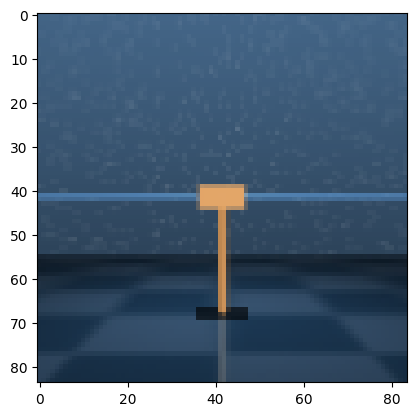

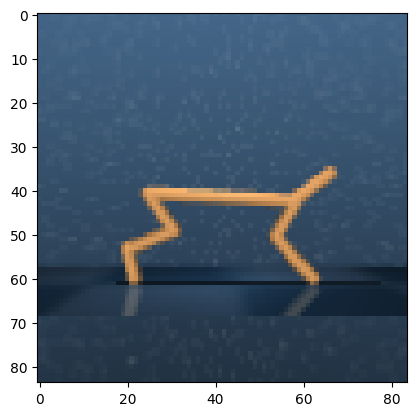

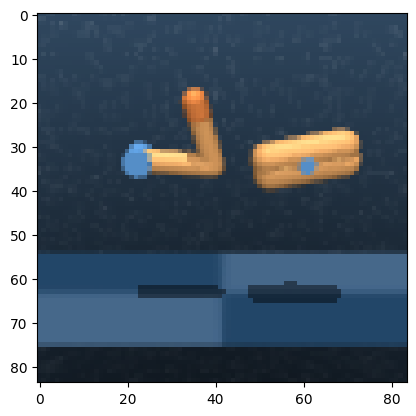

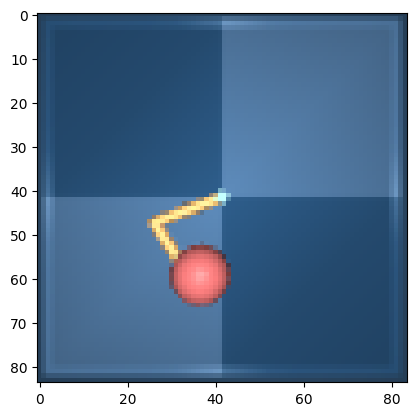

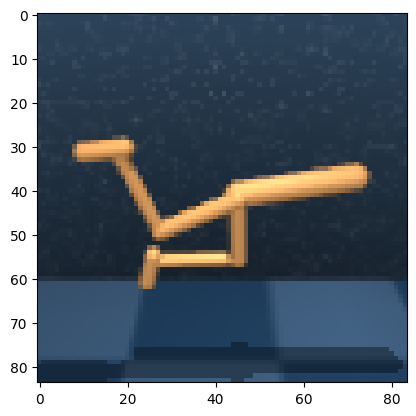

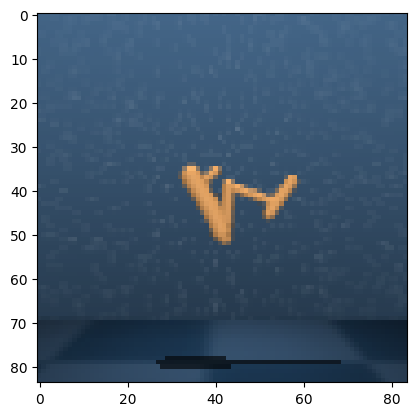

In [8]:
for env_id in ["dm_control/cartpole-swingup-v0", "dm_control/cheetah-run-v0", "dm_control/finger-spin-v0", "dm_control/reacher-easy-v0", "dm_control/walker-walk-v0", "dm_control/hopper-hop-v0"]:
    env = DMCPixelsWrapper(gym.make(env_id, render_mode="rgb_array", render_kwargs=dict(width=84, height=84, camera_id=0)))
    env.reset()
    img = env.render()
    plt.imshow(img)
    plt.show()